## Figures BglB thermal stability paper 

### Contents

Summary statistics and those that don't fit neatly into categories below: 

+ unique positions list 
+ PyMOL commands for making a figure showing all the positions mutated 
+ list of mutants that don't express 

Conservation: 

+ percent conservation for each residue from alignment of BglB to Pfam GH1 (1,554 sequences)
+ plot of conservation across BglB sequence 
+ sequence logo 

Visualization of expression, Tm, kcat, KM, and kcat/KM for all 128 mutants 

+ diverging color heat map 
+ compact, minimalistic bar plots 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas
from numpy import log10, log2, inf, nan, arange, linspace 

In [2]:
df = pandas.read_csv( '../data_sets/experimental_data/thermo_paper_data_set.csv', index_col=0 )

### Summary statistics and those that don't fit neatly into categories below

Number of sequence positions mutated:

In [3]:
len( df.sequence_pos.unique() ) 

68

How could you quickly select them in PyMOL? You could use: 

In [4]:
s = '+'.join( [ i for i in df.sequence_pos.dropna().astype( int ).astype( str ) ] ) 
print 'select all_mutants, resi', s 

select all_mutants, resi 12+14+15+16+16+17+17+18+19+19+19+19+32+34+52+72+76+91+101+119+119+119+120+120+120+121+154+163+163+163+163+163+164+164+164+166+167+167+171+171+175+177+177+177+178+178+192+218+220+220+220+220+220+221+222+222+222+222+222+222+236+240+240+240+240+244+244+249+261+293+293+293+293+293+294+294+294+295+295+296+296+298+300+313+315+315+323+323+325+325+325+325+325+325+329+331+341+343+352+353+354+355+358+362+373+379+379+399+399+399+399+399+400+403+404+404+406+406+407+407+407+407+407+407+409+415+415+423


List of mutants that do not express:

In [5]:
df[( df.expression == 0 )].index

Index([u'G12N', u'S16N', u'Q19P', u'S32L', u'W34A', u'F72H', u'R76A', u'H119E',
       u'W120A', u'D121F', u'N163K', u'N163E', u'E164G', u'E164R', u'H178R',
       u'A236E', u'R240E', u'A249E', u'M261D', u'N293D', u'N293K', u'Y294L',
       u'T296E', u'H315N', u'M323K', u'W325G', u'P329N', u'F343S', u'G355A',
       u'H379T', u'D403A', u'W407Y', u'W407A', u'W407Q', u'W407R', u'W407G',
       u'W407K'],
      dtype='object', name=u'mutant')

### Conservation along BglB sequence 

Alignment of 1554 Pfam sequences that we trimmed by hand to have catalytic residues as in previous paper 



In [6]:
dat = pandas.read_csv( 'alignment/logo-data-bagel-aligned.txt', sep='\s+' ) 
dat['sequence_pos'] = dat.index + 1 
print len( dat ) 

445


In [7]:
aas = [ u'A', u'C', u'D', u'E', u'F', u'G', u'H', u'I', u'K', u'L', u'M', u'N', u'P', u'Q', u'R', u'S', u'T', u'V', u'W', u'Y' ]

In [8]:
clean_dat = dat[ aas ].copy()
clean_dat.index = dat.amino_acid 

percents = []
for idx, row in clean_dat.iterrows():
    percents.append( row[ idx.upper() ].astype( float ) / row.sum()  )
    
clean_dat['percents'] = percents
clean_dat['sequence_pos'] = range( 1, 446 ) 
clean_dat[ 'entropy' ] = dat.Entropy

In [9]:
print len( clean_dat ) 
clean_dat.sample( 5 ) 

445


,A,C,D,E,F,G,H,I,K,L,...,Q,R,S,T,V,W,Y,percents,sequence_pos,entropy
amino_acid,,,,,,,,,,,,,,,,,,,,,
d,177,0,211,209,10,88,19,8,248,15,...,97,59,40,57,14,2,8,0.153790,322,NaN
n,4,8,1,0,14,4,13,2,0,2,...,0,1,27,32,0,0,1,0.931317,354,NaN
d,1,0,1553,1,7,0,1,3,0,3,...,0,0,0,0,2,0,5,0.983534,63,NaN
a,354,1,32,224,0,23,7,3,163,13,...,56,175,73,29,15,1,2,0.293776,441,NaN
a,739,90,2,8,7,47,6,57,4,25,...,30,0,53,36,413,14,5,0.467426,191,NaN


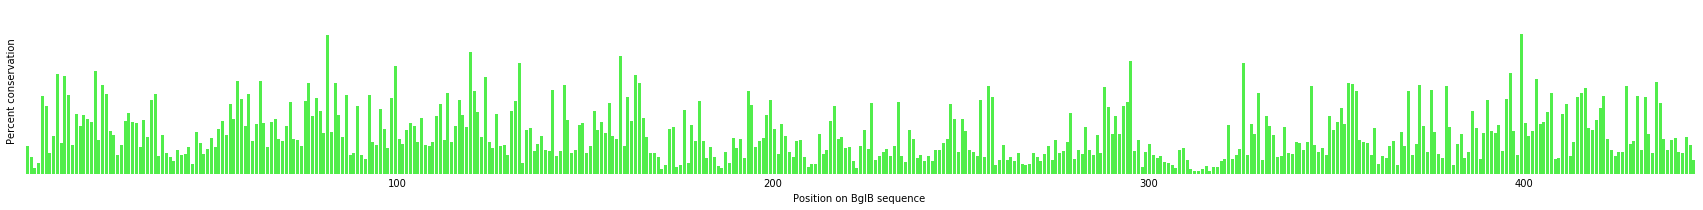

In [10]:
plt.figure( figsize=( 30, 3 ) ) 
#plt.scatter( dat.sequence_pos, ( dat.Entropy / dat.Entropy.max()) ,color='k', label='Entropy (normalized to 1)', marker='.' )
plt.bar( dat.sequence_pos, ( dat.Entropy / dat.Entropy.max()) , lw=0, color=(0.03,.9,0,0.7), label='Entropy' )
#plt.bar( clean_dat.sequence_pos, clean_dat.percents, lw=0, color=(0,0,1,0.1), label='Percent conserved' ) 
#plt.plot( clean_dat.sequence_pos, clean_dat.percents, color='g', label='Percent conserved' ) 

plt.xlim( 0, 446 ) 
plt.ylim( 0, 1.2 ) 
plt.xticks( [ 100, 200, 300, 400 ] ) 
#plt.xticks( [] ) 
plt.ylabel( 'Percent conservation' )
plt.xlabel( 'Position on BglB sequence' ) 
plt.tick_params( length=0 ) 
plt.yticks( [] ) 
#plt.legend()
plt.box(0)
plt.show()

In [11]:
my_percent_conserved = clean_dat[ [ 'sequence_pos', 'percents' ] ]
my_percent_conserved.index = my_percent_conserved.sequence_pos
my_dict = dict( my_percent_conserved.percents ) 

### Depiction of expression, Tm, kcat, KM, and kcat/KM for 128 mutants 

Heat map style uses a diverging (red/blue) color map to compare the log values relative to wild type

In [12]:
# heat map 

h_cols = [ 'expression', 'tm', 'kcat', 'km', 'kcatkm', 'sequence_pos' ] 
h = df[ h_cols ].copy()

h.tm = h.tm - 39.93 
h.kcat = log10( h.kcat / 880 ) 
h.km = log10( (1/h.km) / (1/5.) )
h.kcatkm = log10( h.kcatkm / 174000 )  
h.expression = h.expression # boolean 
h['percent_conserved'] = h.sequence_pos.map( my_dict )

h.replace( [ -inf ], -5, inplace=True ) # damn son
h.sample( 5 )

# sanity check: what are the WT values after this procedure?  
print h.loc[ 'BglB' ] 

expression           1.0
tm                   0.0
kcat                 0.0
km                   0.0
kcatkm               0.0
sequence_pos         NaN
percent_conserved    NaN
Name: BglB, dtype: float64


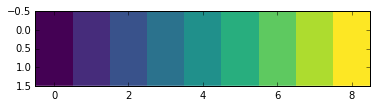

In [13]:
import numpy as np 
damn_son = np.array( [ arange( -5, 4, 1 ), arange( -5, 4, 1 ), ] )
plt.imshow( damn_son, cmap='viridis', interpolation='none' )

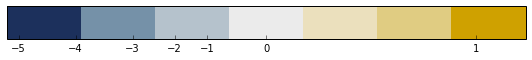

In [14]:
# color map 

from matplotlib import pyplot
import matplotlib as mpl

fig = pyplot.figure(figsize=(8, 3))
ax3 = fig.add_axes([0.05, 0.15, 0.9, 0.15])

cmap = mpl.colors.ListedColormap([
    ( .11, .19, .36 ), # deep blue
    ( .46, .57, .66 ), # medium blue
    ( .71, .76, .80 ), # light blue 
    ( .92, .92, .92 ), # grey 
    ( .92, .88, .74 ), # light yellow
    ( .88, .80, .51 ), # medium yellow 
    ( .81, .63, 0. )   # deep yellow 
])

cmap.set_over((1., 0., 0.))
cmap.set_under(( .11, .19, .36 ))

bounds = [-5.2, -3.9, -2.6, -.3, .3, .6, .9, 1.2 ]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap, norm=norm, ticks=[-5, -4, -2, -3, -1, 0, 1], orientation='horizontal')
pyplot.show()

In [15]:
h.describe()

/usr/local/bin/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,expression,tm,kcat,km,kcatkm,sequence_pos,percent_conserved
count,129.000000,69.000000,80.000000,80.000000,92.000000,128.000000,128.000000
mean,0.713178,-0.590725,-0.836934,-0.172412,-1.449682,241.531250,0.499220
std,0.454041,1.618392,0.948346,0.391784,1.515885,122.181737,0.355953
min,0.000000,-5.680000,-2.944483,-1.251297,-4.240549,12.000000,0.001263
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,1.000000,2.720000,1.097344,1.096910,0.955350,423.000000,1.000000


In [16]:
my_params = { 
    'tm': {
        'cmap': 'viridis', 'vmin': -4, 'vmax': 4 , 
    }, 
    'expression': {
        'cmap': 'Greys', 'vmin': -0.2, 'vmax': 1.2 , 
    }, 
    'kcat': {
        'cmap': cmap, 'vmin': -4, 'vmax': 4 , 
    }, 
    'km': {
        'cmap': cmap, 'vmin': -4, 'vmax': 4 , 
    }, 
    'kcatkm': {
        'cmap': cmap, 'vmin': -4, 'vmax': 4 , 
    }, 
    'percent_conserved': {
        'cmap': 'Greys', 'vmin': 0, 'vmax': 1, 
    }, 
}

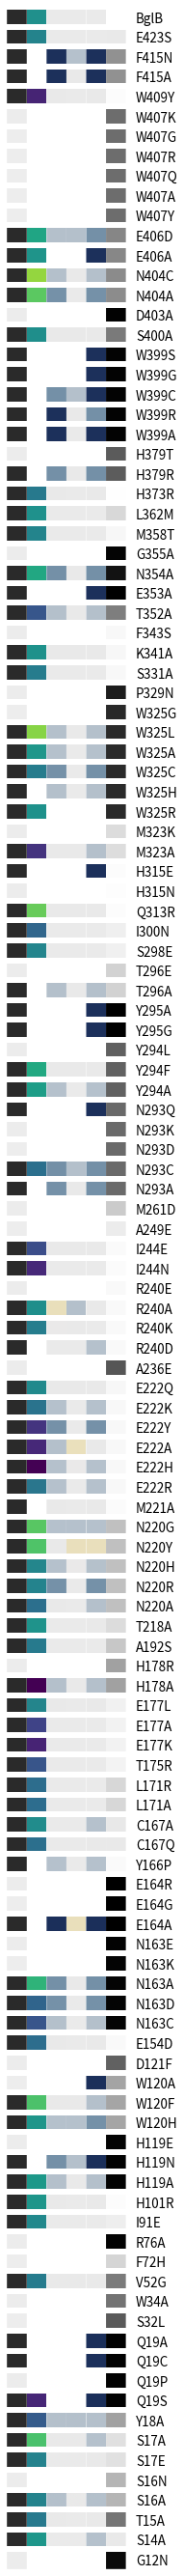

In [17]:
to_plot = enumerate( [ 'expression', 'tm', 'kcat', 'km', 'kcatkm', 'percent_conserved' ] )

plt.figure( figsize=(20,90) ) 
plt.subplots_adjust( left=1., right=1.1 )

for i, col in to_plot:
    plt.subplot( 1, 7, i+1 ) 
    plt.imshow( h[ [ col ] ], interpolation='none', origin=0, **my_params[ col ] )
    plt.xticks([]); plt.yticks([]) 
    plt.box( 0 ) 

    for i, r in enumerate( h.index ):
        plt.plot( [ -.5, .5 ], [ i+0.5, i+0.5 ], c='w', lw=6 ) 
        
# mutant labels         
font = { 'fontsize': 15, 'fontname': 'Source Sans Pro', }
for i, r in enumerate( h.index ):
    plt.text( 1, i-0.3, r, fontdict=font )

plt.subplots_adjust(wspace=0, hspace=0)

#plt.show()
plt.savefig( 'heatmap_out.png', dpi=200 ) 

In [ ]:
# wrapped heat map (yay!) 

to_plot = enumerate( [ 'expression', 'tm', 'kcat', 'km', 'kcatkm', 'percent_conserved' ] )

#plt.figure( figsize=(20,90) ) 
#plt.subplots_adjust( left=1., right=1.1 )



to_plot = enumerate( [ 'expression', 'tm', 'kcat', 'km', 'kcatkm', 'percent_conserved' ] )

plt.figure( figsize=(20,90) ) 
plt.subplots_adjust( left=1., right=1.1 )

for i, col in to_plot:
    plt.subplot( 1, 7, i+1 ) 
    plt.imshow( h[ [ col ] ], interpolation='none', origin=0, **my_params[ col ] )
    plt.xticks([]); plt.yticks([]) 
    plt.box( 0 ) 

    for i, r in enumerate( h.index ):
        plt.plot( [ -.5, .5 ], [ i+0.5, i+0.5 ], c='w', lw=6 ) 
        
# mutant labels         
font = { 'fontsize': 15, 'fontname': 'Source Sans Pro', }
for i, r in enumerate( h.index ):
    plt.text( 1, i-0.3, r, fontdict=font )

plt.subplots_adjust(wspace=0, hspace=0)

#plt.show()
plt.savefig( 'heatmap_out.png', dpi=200 ) 

XXXXXXXXXXXXXXXXXX


for i, col in to_plot:
    plt.subplot( 1, 7, i+1 ) 
    plt.imshow( h[ [ col ] ], interpolation='none', origin=0, **my_params[ col ] )
    plt.xticks([]); plt.yticks([]) 
    plt.box( 0 ) 

    for i, r in enumerate( h.index ):
        plt.plot( [ -.5, .5 ], [ i+0.5, i+0.5 ], c='w', lw=6 ) 
        
# mutant labels         
font = { 'fontsize': 15, 'fontname': 'Source Sans Pro', }
for i, r in enumerate( h.index ):
    plt.text( 1, i-0.3, r, fontdict=font )

plt.subplots_adjust(wspace=0, hspace=0)

#plt.show()
plt.savefig( 'heatmap_out.png', dpi=200 ) 

### Bar plot style 

using minimalistic bar plots, with a thick band indicating a 2-fold spread around native values. 

In [18]:
# bar plot style 

b_cols = [ 'kcat', 'err_kcat', 'km', 'err_km', 'kcatkm', 'err_kcatkm' ] 
j = df[ b_cols ].copy()
j = log10( j ) + 1 

In [19]:
j.loc['BglB']

kcat          3.944483
err_kcat      2.000000
km            1.698970
err_km        0.301030
kcatkm        6.240549
err_kcatkm    4.903090
Name: BglB, dtype: float64

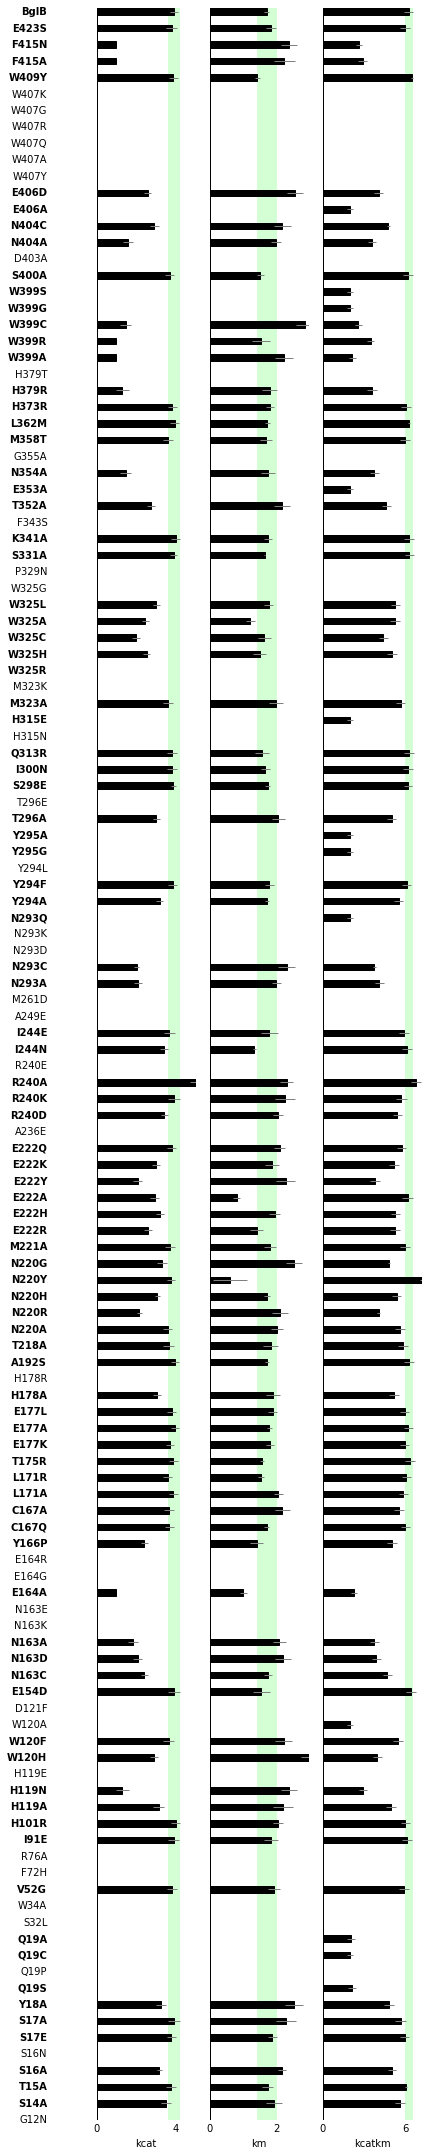

In [20]:
#http://faculty.washington.edu/stuve/log_error.pdf
#describes how to log error bars 

plt.figure( figsize=(8,30) ) 

bar_cols = [ 
    ( 'kcat', 'err_kcat' ), 
    ( 'km', 'err_km' ), 
    ( 'kcatkm', 'err_kcatkm' ), 
]

for i, ( col, err ) in enumerate( bar_cols ):
    plt.subplot( 1, 5, i+1 )
    x_vals = [ i for i in range( len( h ) ) ]
    plt.barh( x_vals, j[col], color='k', height=0.4, edgecolor=None, 
        xerr=0.434*j[err]/j[col],
        ecolor='gray', capsize=0, align='center' )
    plt.tick_params( length=0 ) 
    plt.yticks([])

    my_val = j.loc['BglB'][ col ]              
    plt.fill_between( [my_val - 0.3, my_val + 0.3], 128.2, color=(0,1,0,0.17), linewidth=0 ) 
    
    plt.xticks( [ 0, my_val.round() ] )
    plt.box( 0 ) 
    
    plt.plot( ( 0, 0 ), ( 0, 128.2 ), color='k' ) 
    plt.xlabel( col ) 

for i, r in enumerate( h.index ):
    if df.loc[ r ][ 'expression' ] == 1:
        font = { 'weight': 'bold', 'horizontalalignment': 'right' }
        plt.text( -20, i-.2, r, fontdict=font )
    else:
        font = { 'horizontalalignment': 'right' }
        plt.text( -20, i-.2, r, fontdict=font )      

plt.tight_layout()
plt.savefig( 'bar_plot_out.png', dpi=600 ) 

In [21]:
# kinetic constants versus tm 

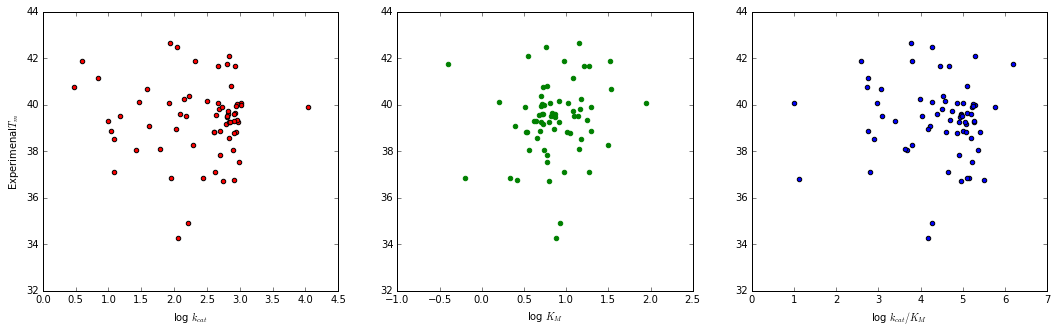

In [22]:
plt.figure( figsize=( 18, 5 ) )

plt.subplot( 1, 3, 1 ) 
plt.scatter( log10( df.kcat ), df.tm, c='r' ) 
plt.xlabel( 'log $k_{cat}$' )
plt.ylabel( 'Experimenal$T_m$' )
#plt.title( '$T_m$, PCC={:2.2f}'.format( my_r ) )

plt.subplot( 1, 3, 2 ) 
plt.scatter( log10( df.km ), df.tm, color='g' ) 
plt.xlabel( 'log $K_M$' )
#plt.title( 'log $K_M$' )

plt.subplot( 1, 3, 3 ) 
plt.scatter( log10( df.kcatkm ), df.tm, c='b' ) 
plt.xlabel( 'log $k_{cat}/K_M$' )
#plt.title( 'log $k_{cat}/K_M$' ) 

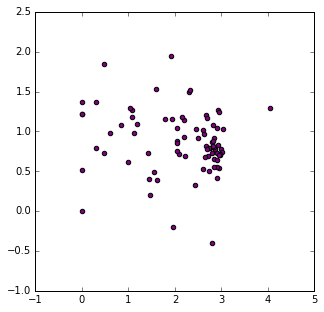

In [23]:
# kcat v km 

plt.figure( figsize=( 5, 5 ) )
plt.scatter( log10( df.kcat ), log10( df.km ), c='purple' ) 

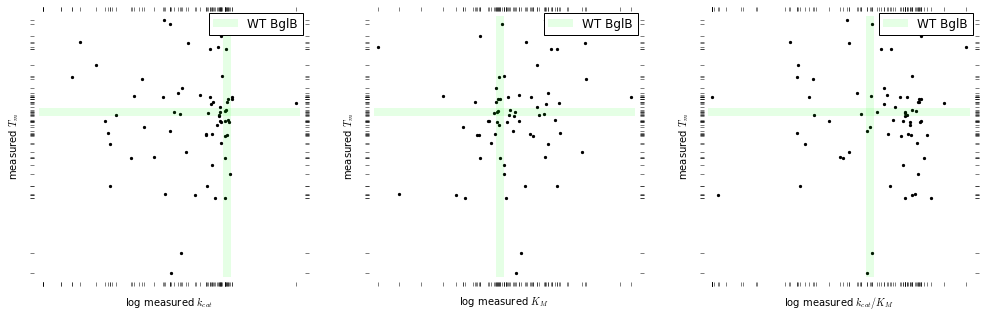

In [24]:
# Tufte-style way of doing this (better) 

constants = [ 
    ( 'kcat', 880, '$k_{cat}$' ),
    ( 'km', 5.5, '$K_M$' ),
    ( 'kcatkm', 17400, '$k_{cat}/K_M$' ),
] 

plt.figure( figsize=( 17, 5 ) ) 

for idx, ( constant, native_value, fmt_str ) in enumerate( constants ):
    
    x = log10( df[ constant ] ) 
    y = df.tm
    my_log_value = log10( native_value ) 
    
    plt.subplot( 1, 3, idx+1 ) 
    plt.scatter( x, y, color='k', marker='.' ) 
    plt.xlabel( 'log measured {}'.format( fmt_str ) )
    plt.ylabel( 'measured $T_m$' ) 

    plt.xticks( x.dropna(), ('') )
    plt.yticks( y.dropna(), ('') )
    
    plt.plot( [ x.min(), x.max() ], [ 39.6, 39.6 ], color=(0,1,0,0.1), lw=8 )
    plt.legend( [ 'WT BglB' ] )
    plt.plot( [ my_log_value ] * 2, [ y.min(), y.max() ], color=(0,1,0,0.1), lw=8 )

    plt.box( 0 ) 
    
plt.savefig( 'tm_versus_all.png', dpi=600 ) 

In [25]:
my_muts = [ 'E222H', 'Q19S', 'N404C', 'W120F' ] 

In [26]:
# data for panel figure 

df[ 'delta_tm' ] = df[ 'tm' ] - 39.9 
print df.loc[ my_muts ].sort_values( 'tm' )  

        sequence_pos  expression     tm why_no_tm   kcat     km   kcatkm  ki  \
mutant                                                                         
E222H          222.0           1  34.91       NaN  160.0   8.54  18695.0 NaN   
Q19S            19.0           1  36.82       NaN    NaN    NaN     13.0 NaN   
W120F          120.0           1  41.68       NaN  472.0  16.08  29334.0 NaN   
N404C          404.0           1  42.65       NaN   85.2  14.40   5917.0 NaN   

        eki  percent_err_kcat   ...     err_km  err_kcatkm  in_plos_paper  \
mutant                          ...                                         
E222H   NaN               1.9   ...       0.53      1212.0              1   
Q19S    NaN               NaN   ...        NaN         3.0              1   
W120F   NaN               4.4   ...       2.07      3980.0              1   
N404C   NaN               4.3   ...       1.90         1.0              0   

        gel_number     k  err_tm  err_k  Siena gel level

In [27]:
# individual Tm plots for selected mutants 

assay_data = pandas.read_csv( '../data_sets/experimental_data/assay_data/corrected_assay_data.csv', index_col=0 )
assay_data.sample( 5 ) 

,well,rate,mutant_old,temp
mutant,,,,
BglB,C9,0.000680,BglB,44.30
Y294F,A3,0.000173,Y294F,50.00
E222H,G12,0.004000,E222H,32.90
M323A,A6,0.000047,M323A,50.00
W325C,D11,0.001280,W325C,41.45


In [28]:
df.loc[ 'BglB' ] 

sequence_pos           NaN
expression               1
tm                   39.93
why_no_tm              NaN
kcat                   880
km                       5
kcatkm              174000
ki                     NaN
eki                    NaN
percent_err_kcat       1.1
err_kcat                10
percent_err_km           4
err_km                 0.2
err_kcatkm            8000
in_plos_paper            1
gel_number             NaN
k                    -1.19
err_tm                0.09
err_k                 0.08
Siena gel levels         1
Alex gel levels        NaN
delta_tm              0.03
Name: BglB, dtype: object

In [29]:
plt.plot?

In [30]:
# define logistic equation 
def f(x, x0, k): 
    return 1/(1+np.exp(-k*(x-x0)))

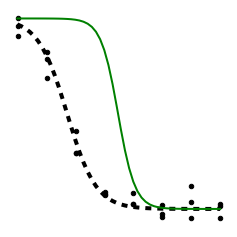

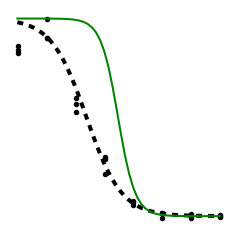

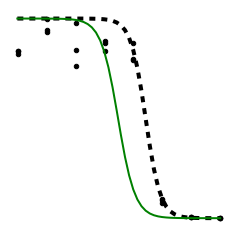

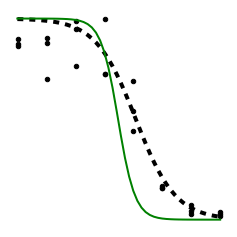

In [31]:
for my_mut in my_muts:
    plt.figure( figsize=( 4, 4 ) ) 
    
    # assay data 
    my_data = assay_data.loc[ my_mut ].copy()
    my_data[ 'rate' ] = my_data[ 'rate' ] / my_data['rate'].max()   
    plt.box( 0 ) 
    plt.xticks( [] )
    plt.yticks( [] )
    plt.scatter( my_data.temp, my_data.rate, c='k' )
    
    # fit and WT values 
    my_params = df.loc[ my_mut ][ [ 'tm', 'k' ] ]  
    x_vals = np.linspace( 30, 50, 50 ) 
    plt.plot( x_vals, f( x_vals, * my_params ), 'k--', lw=4 )
    plt.plot( x_vals, f( x_vals, 39.93, -1.19 ), c='g', lw=2 )

In [32]:
# single feature correlations

In [33]:
# machine learning results 

In [41]:
! cp /Users/alex/Documents/bagel-benchmark/foldx_runs/pssm_app/foldx_mutants.csv ../data_sets/foldx.csv 

In [47]:
! ls ../data_sets/features/

benchmark_feature_set.csv fast_relax.csv
ddg_feature_set.csv       foldx.csv


In [55]:
# collect all our data sets 

bench = pandas.read_csv( '../data_sets/features/benchmark_feature_set.csv' )
bench = bench.groupby( 'description' ).apply( lambda x: x.sort_values( 'total_score' ).head( 10 ).mean() ) 